In [163]:
##copied from a note i left in the back stars section
## Haven't got to it yet but i have clustered the stars in this galaxy and will find all the distances soon
## I've done this and the top image so if its cool im gonna leave the other views to you guys
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

# configure notebook for plotting
%matplotlib inline 
mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# define default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

In [164]:
#BOTTOM
ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Bottom/Star_Data.csv') 
#print(bottomstars.keys())

In [272]:
ddir_stars = '/Users/eleanor/Downloads/universe_2/'
variables = ddir_stars + '/Variable_Star_Data/'
print(variables)

/Users/eleanor/Downloads/universe_2//Variable_Star_Data/


Text(0.5, 1.0, 'Bottom')

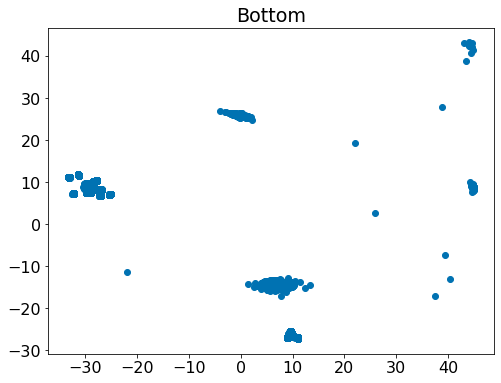

In [236]:
XB=bottomstars.X
YB=bottomstars.Y

CB=np.array(list(zip(bottomstars.X,bottomstars.Y)))
plt.scatter(CB[:,0], CB[:,1])
plt.title('Bottom')

In [166]:
from sklearn.cluster import KMeans
import math

In [167]:
kmeans=KMeans(n_clusters=12)
kmeans.fit(CB)

KMeans(n_clusters=12)

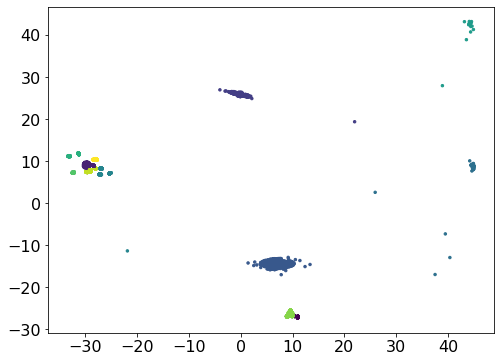

In [168]:
plt.scatter(CB[:,0], CB[:,1],s=6, c=kmeans.labels_)

In [169]:
xb = kmeans.cluster_centers_ # This

In [170]:
kmeans.labels_

array([1, 1, 1, ..., 4, 2, 4], dtype=int32)

In [171]:
xb

array([[ 10.76941671, -26.96794712],
       [-29.27824537,   8.97353754],
       [ -0.15756652,  25.85765781],
       [  6.94965162, -14.34628868],
       [ 44.06981429,   7.247     ],
       [-26.36139981,   7.34040429],
       [ 43.79152308,  40.96985385],
       [-32.22428114,  11.44455232],
       [-32.27437828,   7.28564368],
       [  9.58038264, -26.36522858],
       [-28.93937056,   7.77322801],
       [-28.04827114,  10.35658308]])

In [172]:
#Top
ddir = '/Users/eleanor/Downloads/universe_2/'
topstars = pd.read_csv(ddir+'Top/Star_Data.csv') 

Text(0.5, 1.0, 'Top')

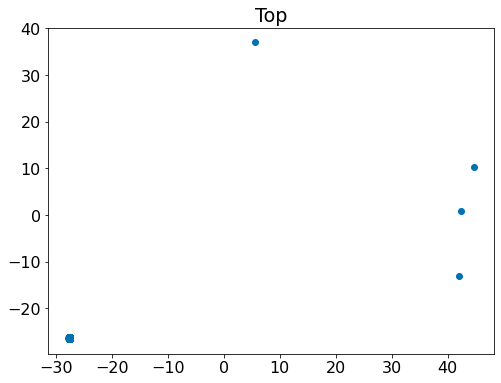

In [235]:
XT=topstars.X
YT=topstars.Y

CT=np.array(list(zip(topstars.X,topstars.Y)))
plt.scatter(CT[:,0], CT[:,1]) #centre of this one is (-27.7,-26.5)
centre=(-27.7,-26.5)
plt.title("Top")

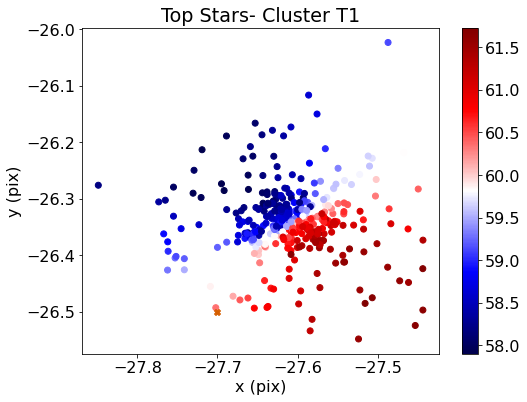

In [174]:
d = np.sqrt((topstars.X-centre[0])** 2 + (topstars.Y - centre[1])**2)
galaxyt1 = topstars[d<1] # filter to only close ones
plt.scatter(galaxyt1.X,galaxyt1.Y,c=galaxyt1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster T1');

Text(0.5, 1.0, 'T1')

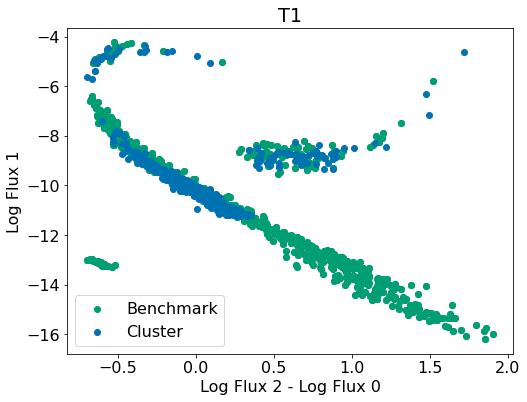

In [233]:
m0, m1, m2 = (np.log10(galaxyt1['BlueF']), 
              np.log10(galaxyt1['GreenF']), 
              np.log10(galaxyt1['RedF'])) 
colour = m2-m0

#st1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

10**(8.6/2)
plt.title('T1')

In [282]:
#vargalaxy = galaxyt1[galaxyt1['Variable?']==1] THIS searches through a defined galaxy and pulls all variable stars
#print(vargalaxy) prints all variables in galaxy
# galaxyt1.iloc[[24]] #select one star and print its information

           Name        X        Y         BlueF        GreenF          RedF  \
24   TopS083338 -27.5179 -26.3541  5.001000e-17  1.707000e-16  1.548000e-15   
66   TopS083475 -27.6169 -26.3581  3.359000e-18  9.310000e-18  5.565000e-17   
76   TopS083499 -27.5679 -26.3742  4.822000e-18  1.278000e-17  6.813000e-17   
89   TopS083538 -27.6030 -26.3217  5.390000e-18  1.076000e-17  3.309000e-17   
108  TopS083595 -27.5809 -26.3723  6.611000e-14  6.365000e-14  4.341000e-14   
147  TopS083693 -27.6063 -26.3439  6.620000e-14  6.553000e-14  4.653000e-14   
168  TopS083768 -27.5497 -26.2464  7.092000e-14  5.973000e-14  3.104000e-14   
210  TopS083905 -27.6142 -26.3477  7.318000e-14  6.273000e-14  3.431000e-14   
265  TopS084070 -27.5967 -26.3305  8.505000e-14  7.372000e-14  4.107000e-14   
267  TopS084074 -27.5651 -26.3365  3.182000e-17  2.504000e-17  1.102000e-17   
273  TopS084087 -27.6726 -26.3469  1.522000e-17  1.177000e-17  5.324000e-18   
278  TopS084097 -27.6061 -26.3521  4.481000e-17  3.4

In [176]:
#Right
ddir = '/Users/eleanor/Downloads/universe_2/'
rightstars = pd.read_csv(ddir+'Right/Star_Data.csv') 

Text(0.5, 1.0, 'Right')

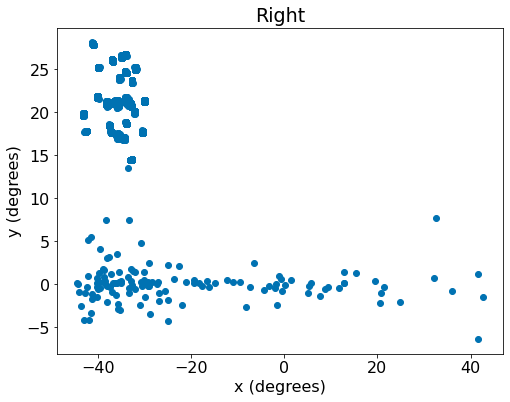

In [234]:
XR=rightstars.X
YR=rightstars.Y

CR=np.array(list(zip(rightstars.X,rightstars.Y)))
plt.scatter(CR[:,0], CR[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Right')

array([[-4.00272124e+01,  2.17572629e+01],
       [-3.21645765e+01,  2.45406527e+01],
       [-3.46414152e+01,  1.77057290e+01],
       [ 4.50649048e+00, -1.64300000e-01],
       [-4.27783920e+01,  1.85725665e+01],
       [-4.10749273e+01,  2.79616048e+01],
       [-3.30035054e+01,  2.08089824e+01],
       [-3.73017602e+01,  1.80531374e+01],
       [-3.91036551e+01,  1.74534694e-01],
       [-3.98238289e+01,  2.51889171e+01],
       [-1.46824400e+01, -8.04733333e-02],
       [-3.44441052e+01,  2.44505732e+01],
       [-3.04626589e+01,  1.77067373e+01],
       [-2.99399392e+01,  2.13046949e+01],
       [-3.68923329e+01,  2.60603419e+01],
       [-3.28145281e+01,  1.44394306e+01],
       [-3.44378538e+01,  2.65836430e+01],
       [-2.92841941e+01,  2.81382353e-02],
       [-3.66747579e+01,  2.10755905e+01],
       [ 3.03487091e+01, -4.23809091e-01]])

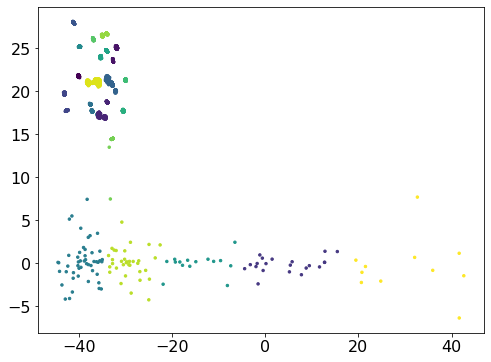

In [178]:
kmeans=KMeans(n_clusters=20)
kmeans.fit(CR)
plt.scatter(CR[:,0], CR[:,1],s=6, c=kmeans.labels_)
xr = kmeans.cluster_centers_
xr

array([[-3.66747579e+01,  2.10755905e+01],
       [ 3.03487091e+01, -4.23809091e-01],
       [-3.28145281e+01,  1.44394306e+01],
       [-3.21645765e+01,  2.45406527e+01],
       [-4.10749273e+01,  2.79616048e+01],
       [-4.00272124e+01,  2.17572629e+01],
       [-3.30035054e+01,  2.08089824e+01],
       [ 4.50649048e+00, -1.64300000e-01],
       [-4.27783920e+01,  1.85725665e+01],
       [-3.44378538e+01,  2.65836430e+01],
       [-3.91036551e+01,  1.74534694e-01],
       [-3.73017602e+01,  1.80531374e+01],
       [-3.04626589e+01,  1.77067373e+01],
       [-1.46824400e+01, -8.04733333e-02],
       [-3.98238289e+01,  2.51889171e+01],
       [-3.46414152e+01,  1.77057290e+01],
       [-3.44441052e+01,  2.44505732e+01],
       [-2.99399392e+01,  2.13046949e+01],
       [-3.68923329e+01,  2.60603419e+01],
       [-2.92841941e+01,  2.81382353e-02]])

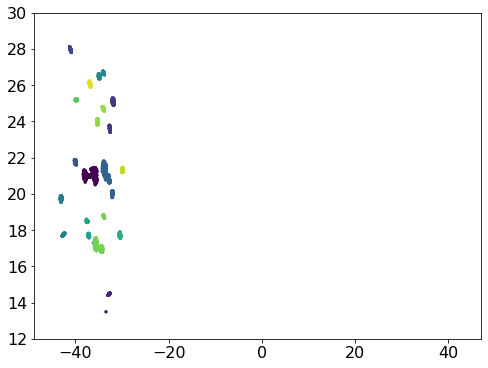

In [179]:
#stars on bottom look like individual, get rid of them to cluster
kmeans=KMeans(n_clusters=20)
kmeans.fit(CR)
plt.scatter(CR[:,0], CR[:,1],s=6, c=kmeans.labels_)
plt.ylim((12,30))
xr = kmeans.cluster_centers_
xr

Text(0.5, 1.0, 'Left')

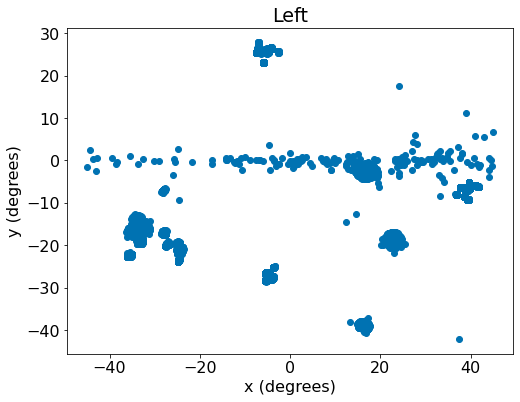

In [237]:
#Left
ddir = '/Users/eleanor/Downloads/universe_2/'
leftstars = pd.read_csv(ddir+'Left/Star_Data.csv') 
XL=rightstars.X
YL=rightstars.Y

CL=np.array(list(zip(leftstars.X,leftstars.Y)))
plt.scatter(CL[:,0], CL[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Left')

array([[ -6.70801756,  26.12842608],
       [ -4.66247907, -26.93237377],
       [ 39.21870605,  -6.81238647],
       [-27.61514928, -18.21681123],
       [ 16.27992345,  -2.28780338],
       [ 16.27581863, -38.88327001],
       [ 22.69950279, -18.69796356],
       [-33.98271339, -15.31049775],
       [-27.72052661,  -6.74524347],
       [-24.61571099, -21.18091404],
       [-34.3453425 , -20.61102274],
       [ -4.67100549,  25.11107744]])

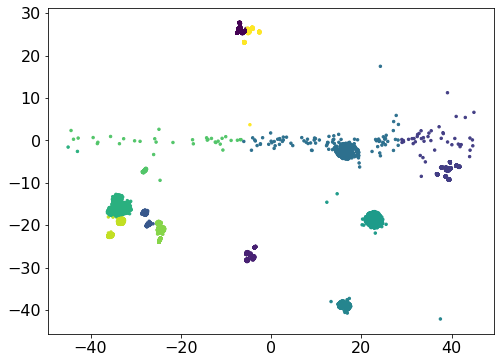

In [181]:
kmeans=KMeans(n_clusters=12)
kmeans.fit(CL)
plt.scatter(CL[:,0], CL[:,1],s=6, c=kmeans.labels_)
xl = kmeans.cluster_centers_
xl

Text(0.5, 1.0, 'Front')

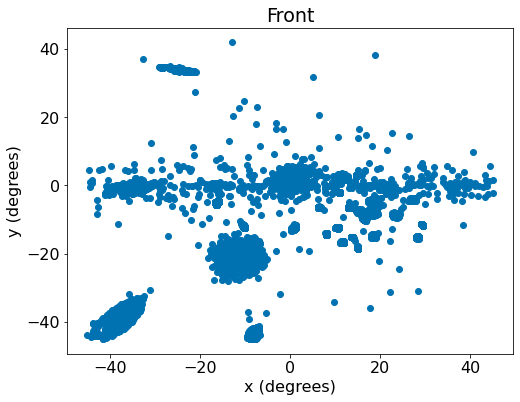

In [238]:
#Front
ddir = '/Users/eleanor/Downloads/universe_2/'
frontstars = pd.read_csv(ddir+'Front/Star_Data.csv') 
XF=frontstars.X
YF=frontstars.Y

CF=np.array(list(zip(frontstars.X,frontstars.Y)))
plt.scatter(CF[:,0], CF[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Front')

array([[ 14.83716412, -16.42589832],
       [-16.31680692,  -4.97802112],
       [-37.88745448, -38.98062688],
       [ 16.22709174,   0.49539002],
       [-24.83723476,  33.87115245],
       [ -8.17822995, -43.41380792],
       [  0.16062933,   2.11029051],
       [ 17.29151569,  -6.81251895],
       [-10.94783942, -17.60958602],
       [  7.0914185 , -11.45557159],
       [-35.12068182,  -0.68912874],
       [ 27.40526587,  -9.87401371]])

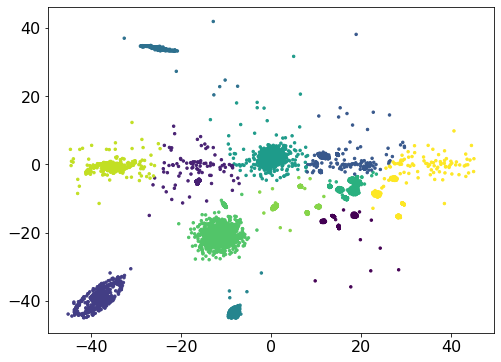

In [183]:
kmeans=KMeans(n_clusters=12)
kmeans.fit(CF)
plt.scatter(CF[:,0], CF[:,1],s=6, c=kmeans.labels_)
xf = kmeans.cluster_centers_
xf

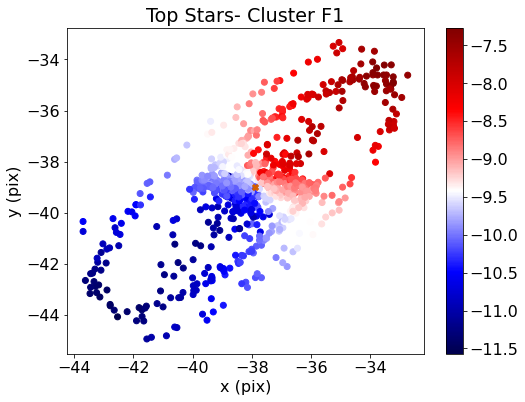

In [212]:
centre = (-37.88745448, -38.98062688)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf1 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf1.X,galaxyf1.Y,c=galaxyf1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F1');

Text(0.5, 1.0, 'F1')

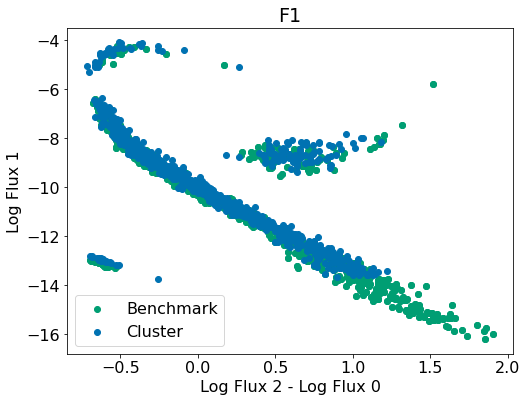

In [232]:
m0, m1, m2 = (np.log10(galaxyf1['BlueF']), 
              np.log10(galaxyf1['GreenF']), 
              np.log10(galaxyf1['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
10**(6/2)
plt.title('F1')

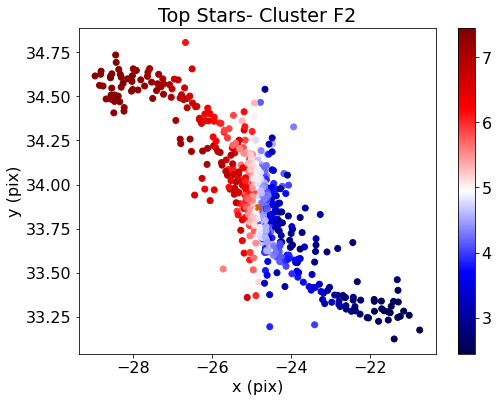

In [200]:
centre = (-24.83723476,  33.87115245)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf2 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf2.X,galaxyf2.Y,c=galaxyf2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F2');

Text(0.5, 1.0, 'F2')

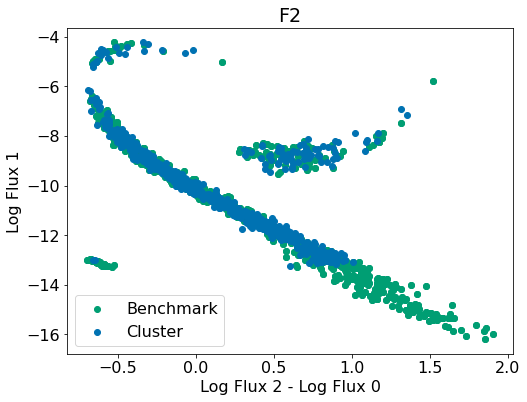

In [231]:
m0, m1, m2 = (np.log10(galaxyf2['BlueF']), 
              np.log10(galaxyf2['GreenF']), 
              np.log10(galaxyf2['RedF'])) 
colour = m2-m0

#sf2 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
10**(6.5/2)
plt.title("F2")

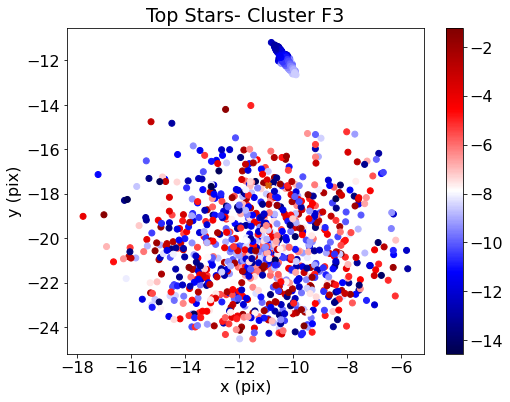

In [218]:
centre = (-10.94783942, -17.60958602)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf3 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf3.X,galaxyf3.Y,c=galaxyf3.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F3');

3162.2776601683795

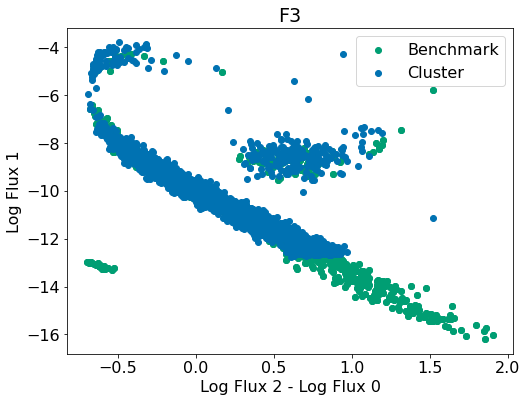

In [230]:
m0, m1, m2 = (np.log10(galaxyf3['BlueF']), 
              np.log10(galaxyf3['GreenF']), 
              np.log10(galaxyf3['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title("F3")
10**(7/2)

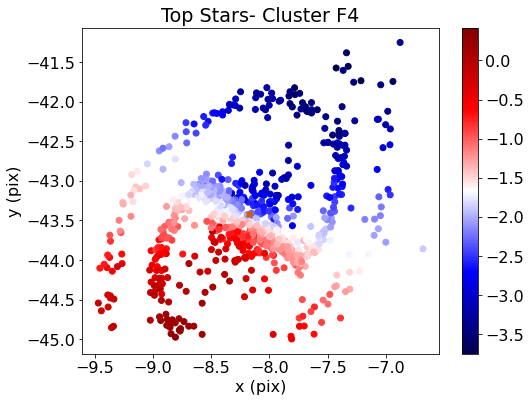

In [223]:
centre = (-8.17822995, -43.41380792)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf4 = frontstars[d<4] # filter to only close ones
plt.scatter(galaxyf4.X,galaxyf4.Y,c=galaxyf4.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F4');

3162.2776601683795

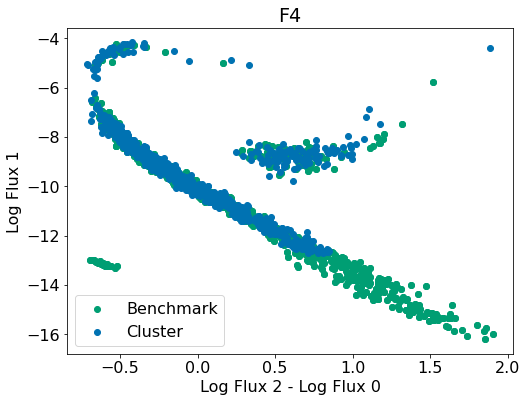

In [229]:
m0, m1, m2 = (np.log10(galaxyf4['BlueF']), 
              np.log10(galaxyf4['GreenF']), 
              np.log10(galaxyf4['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('F4')
10**(7/2)

'/Users/eleanor/Downloads/universe_2//Variable_Star_Data/'

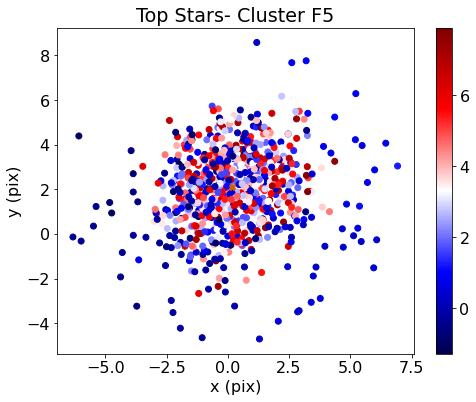

In [269]:
centre = (0.16062933,   2.11029051)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf5 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf5.X,galaxyf5.Y,c=galaxyf5.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F5');
galaxyf5

1778.2794100389228

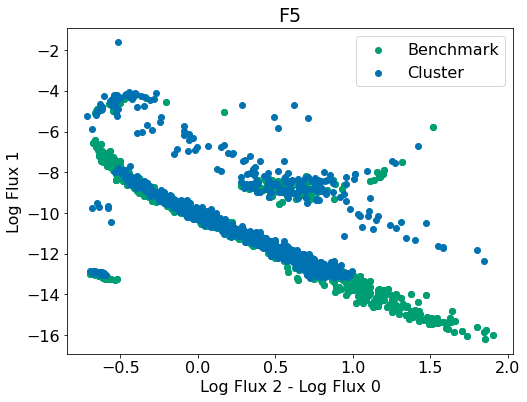

In [246]:
m0, m1, m2 = (np.log10(galaxyf5['BlueF']), 
              np.log10(galaxyf5['GreenF']), 
              np.log10(galaxyf5['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('F5')
10**(6.5/2)

Text(0.5, 1.0, 'Back')

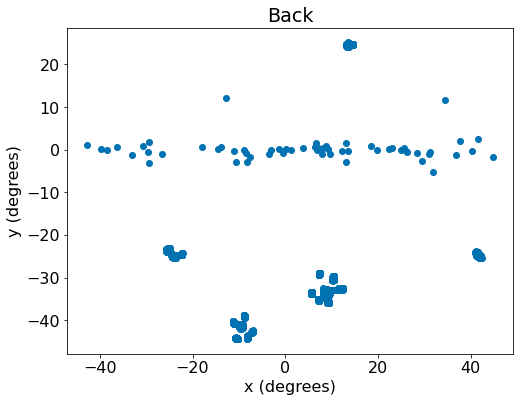

In [239]:
#Back
## Haven't got to it yet but i have clustered the stars in this galaxy and will find all the distances soon
## I've done this and the top image so if its cool im gonna leave the other views to you guys
ddir = '/Users/eleanor/Downloads/universe_2/'
backstars = pd.read_csv(ddir+'Back/Star_Data.csv') 
XBA=backstars.X[backstars.Y<-10&backstars.Y>19]
YBA=backstars.Y

CBA=np.array(list(zip(backstars.X,backstars.Y)))
plt.scatter(CBA[:,0], CBA[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Back')

(13645,) (13645,)


Text(0.5, 1.0, 'Back-Reduced')

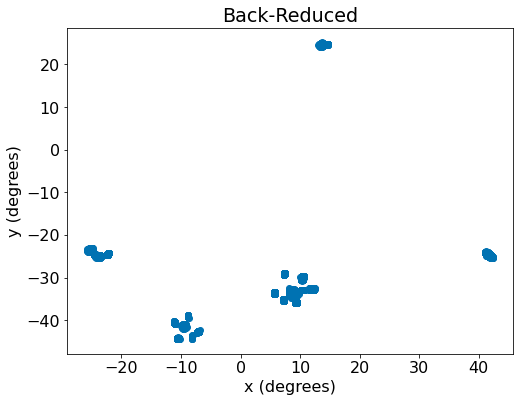

In [265]:
XBA=backstars.X[(backstars.Y<-10)|(backstars.Y>19)]
YBA=backstars.Y[(backstars.Y<-10)|(backstars.Y>19)]
# XBA=backstars.X[(backstars.Y>19)]
# YBA=backstars.Y[(backstars.Y>19)]
print(np.shape(YBA), np.shape(XBA))
CBA=np.array(list(zip(XBA,YBA)))
plt.scatter(CBA[:,0], CBA[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Back-Reduced')

array([[ 41.65401492, -24.66319513],
       [ -8.79838502, -39.13926435],
       [ 14.52497384,  24.71534616],
       [  8.76339623, -33.63173543],
       [-23.7411227 , -25.02280837],
       [ -7.08522101, -42.68815294],
       [ 10.42071839, -29.80672286],
       [ 12.25934408, -32.65742111],
       [-10.51791533, -44.26506245],
       [  7.38684234, -29.09425255],
       [  7.23939239, -35.28150299],
       [ -9.51475882, -41.44602602],
       [  5.71196328, -33.68406677],
       [  9.26548462, -35.81633573],
       [-22.32923073, -24.51114134],
       [ 10.37419578, -32.92942329],
       [-25.29921244, -23.51684139],
       [ -8.14270442, -43.96367691],
       [-11.13208013, -40.58794292],
       [ 13.56565183,  24.58746981],
       [ 10.28218743, -30.58019354],
       [-24.42321423, -24.76371036],
       [ 11.69323639, -32.71761962]])

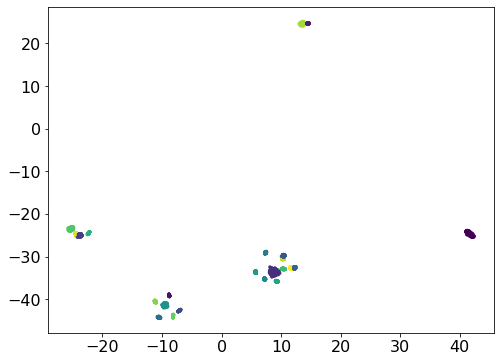

In [264]:
kmeans=KMeans(n_clusters=23)
kmeans.fit(CBA)
plt.scatter(CBA[:,0], CBA[:,1],s=6, c=kmeans.labels_)
xba = kmeans.cluster_centers_
xba